In [89]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('dataset/xhamster.csv')

df.columns

Index(['id', 'upload_date', 'title', 'channels', 'description', 'nb_views',
       'nb_votes', 'nb_comments', 'runtime', 'uploader'],
      dtype='object')

In [4]:
df.head()

,id,upload_date,title,channels,description,nb_views,nb_votes,nb_comments,runtime,uploader
0,378466,2010-06-29,girl riding black cock,"['BBW', 'Black and Ebony', 'Interracial']",Like this vid? Check out my profile page for m...,17262.0,65.0,11.0,120.0,6e008c23cabf079318976801718b043b383ed6e5
1,478576,2010-11-07,masturbation,['Masturbation'],watching a ebony chick cum.,953.0,3.0,NaN,15.0,54e2b5ed9557fc149d94abe5c6a833b6ce30d56b
2,287146,2010-02-12,sexy horny booty dance,"['Babes', 'Teens', 'Webcams']",Watch as this sexy hot horny babe bounce her n...,6060.0,11.0,3.0,163.0,8b820c38b9d56e10c9bbe53e76afc26f9d750e25
3,378462,2010-06-29,group of young bareback sportsmen d,['Men'],NaN,12742.0,87.0,15.0,1980.0,e9b319e3708b85d1f533907fd3e95897610abf7d
4,1583073,2012-11-18,horny latinos double penetrating hot ass in a ...,['Gays'],Three Brazilian latino studs get horny in a st...,32879.0,75.0,6.0,1318.0,1d6d602097c45a3b08bbac16b1c6b72a75ff0f1e


In [5]:
len(df)

786121

In [12]:
top_vid = df[['title', 'nb_views', 'nb_votes']]

top_vid.sort_values('nb_views', ascending=False, inplace=True)

top_vid.head(10)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,nb_views,nb_votes
619030,arab hijab sex,8286734.0,4494.0
747466,my stepmother in the kitchen early morning,7432547.0,7333.0
82071,bbw my gir,7243879.0,3444.0
19121,stepdaddy f70,6353489.0,6230.0
32755,the mom was never able to do patience 2,6092737.0,3438.0
507697,hot summer hot hot mo,5882769.0,3230.0
590083,big black dick fuck skinny white teen nv,5880327.0,6449.0
116080,mom boy vintage,5834600.0,5057.0
626689,moms sexual adventures,5815656.0,3981.0
322119,great milf 40,5662096.0,4297.0


In [15]:
df.nb_views.describe()

count    7.851190e+05
mean     7.550614e+04
std      1.733908e+05
min      1.000000e+00
25%      5.990000e+03
50%      2.299000e+04
75%      7.073600e+04
max      8.286734e+06
Name: nb_views, dtype: float64

In [14]:
df.nb_comments.describe()

count    726301.000000
mean         11.716061
std          14.874591
min           1.000000
25%           3.000000
50%           7.000000
75%          15.000000
max         885.000000
Name: nb_comments, dtype: float64

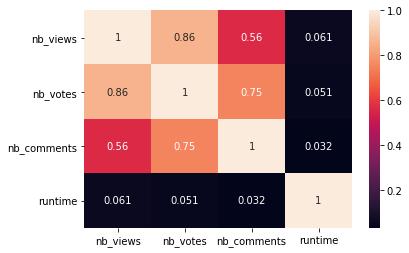

In [29]:
corr = df[['nb_views','nb_votes','nb_comments','runtime']].corr()

sns.heatmap(corr, annot=True)

In [42]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_new = df[df['upload_date'].notnull()]

df_new['month'] = df_new['upload_date'].apply(lambda x :  month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(df_new['month'].value_counts()).reset_index()

month_df.columns = ['month','title']

month_df

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,month,title
0,Jul,71414
1,Jun,69922
2,Jan,69535
3,Feb,69308
4,Aug,68503
5,Oct,68330
6,Sep,67982
7,Dec,66695
8,Nov,64936
9,May,59866


In [52]:
df_new = df[df['upload_date'].notnull()]

df_new['year'] = df_new['upload_date'].apply(lambda x :  x.split('-')[0])

year_df = pd.DataFrame(df_new['year'].value_counts().reset_index())

year_df.columns = ['year','uploads']

year_df

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,uploads
0,2012,319141
1,2011,210942
2,2010,104341
3,2009,60810
4,2013,54768
5,2008,30854
6,2007,4263


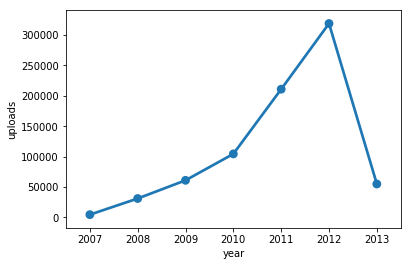

In [53]:
sns.pointplot(x='year', y='uploads', data=year_df)

In [61]:
top_profile = df.groupby('uploader').count().reset_index()[['uploader', 'title']]
top_profile.columns = ['uploader','uploads']

top_profile = top_profile.sort_values('uploads', ascending=False)

top_profile.head(10)

,uploader,uploads
17412,32b6ecffbe885f8940a8da79384ddb6ad8acb6b8,5406
3937,0ba9719a8a43ef6304dc5e2ee4eabc8db4b2b8b7,4199
61369,b1bbcd4a4047deee60667e368373cc8c9233a743,2810
46728,8705925d7a97b3324f93ecad8a7d2370ea0584a7,1708
6693,1392903d92ec7d56b297ad947fdb75f380d6608d,1707
16843,310d4bdb2d17aba8cceaa03aa50a20be0aa287ba,1689
20783,3c786264009d499f4d67dea3487c0ec37dea5fc0,1673
1460,047304dd76a44569ec3a51da2a19f1360530a858,1612
67844,c4a5fb01a6322b4add53eee4ffd3fdfec755bcc5,1609
52361,97c2bce382e2b66fda88178d2e33d51544ef2c5f,1600


In [92]:
df_title = df.dropna(subset=['title'])
title_words = ' '.join(df_title['title'])

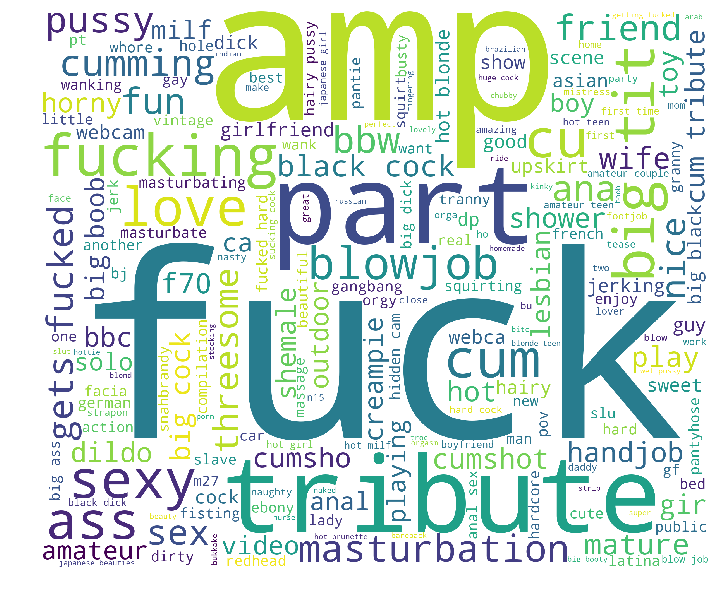

In [97]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(title_words)

plt.figure(figsize=(12,15))
plt.axis('off')
plt.imshow(title_wordcloud)

## TODO